# Ilyas Nayle
## Data Analyst and Machine Learning Engineer


This notebook serves to distinguish between two distinct libraries and showcase their practical application.

Specifically, it leverages the Netflix dataset to create compelling visualizations on a map using the Plotly and Folium libraries.

Enjoy! 🙂

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving netflix_dataset.csv to netflix_dataset.csv
User uploaded file "netflix_dataset.csv" with length 3399671 bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
filename = next(iter(uploaded))

netflix = pd.read_csv(filename)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
selected_columns = [ 'type','country', 'date_added', 'release_year', 'rating', 'duration']


new_df = netflix[selected_columns].copy()
new_df.head(20)

,type,country,date_added,release_year,rating,duration
0,Movie,United States,"September 25, 2021",2020,PG-13,90 min
1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season
3,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons
5,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season
6,Movie,NaN,"September 24, 2021",2021,PG,91 min
7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min
8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons
9,Movie,United States,"September 24, 2021",2021,PG-13,104 min


In [ ]:
new_df.isnull().sum()

type              0
country         831
date_added       10
release_year      0
rating            4
duration          3
dtype: int64

In [ ]:
new_df.dtypes

type            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
dtype: object

In [ ]:
new_df['date_added'] = pd.to_datetime(new_df['date_added'], errors='coerce')

In [ ]:
new_df.head(20)

,type,country,date_added,release_year,rating,duration
0,Movie,United States,2021-09-25,2020,PG-13,90 min
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons
2,TV Show,NaN,2021-09-24,2021,TV-MA,1 Season
3,TV Show,NaN,2021-09-24,2021,TV-MA,1 Season
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons
5,TV Show,NaN,2021-09-24,2021,TV-MA,1 Season
6,Movie,NaN,2021-09-24,2021,PG,91 min
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min
8,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons
9,Movie,United States,2021-09-24,2021,PG-13,104 min


In [ ]:
netflix_expanded = new_df.assign(country=new_df['country'].str.split(', ')).explode('country')

In [ ]:
netflix_expanded.reset_index(drop=True, inplace=True)

In [ ]:
netflix_expanded.head(20)

,type,country,date_added,release_year,rating,duration
0,Movie,United States,2021-09-25,2020,PG-13,90 min
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons
2,TV Show,NaN,2021-09-24,2021,TV-MA,1 Season
3,TV Show,NaN,2021-09-24,2021,TV-MA,1 Season
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons
5,TV Show,NaN,2021-09-24,2021,TV-MA,1 Season
6,Movie,NaN,2021-09-24,2021,PG,91 min
7,Movie,United States,2021-09-24,1993,TV-MA,125 min
8,Movie,Ghana,2021-09-24,1993,TV-MA,125 min
9,Movie,Burkina Faso,2021-09-24,1993,TV-MA,125 min


In [ ]:
netflix_expanded.value_counts('type')

type
Movie      7814
TV Show    3031
Name: count, dtype: int64

In [ ]:
netflix_expanded.dropna(inplace=True)

In [ ]:
netflix_expanded.value_counts('country')

country
United States     3639
India             1045
United Kingdom     785
Canada             432
France             389
                  ... 
Azerbaijan           1
United States,       1
Bahamas              1
Vatican City         1
Afghanistan          1
Name: count, Length: 127, dtype: int64

In [ ]:
netflix_expanded.shape

(9901, 6)

In [ ]:
netflix_expanded['duration'] = netflix_expanded['duration'].str.lower()
def convert_to_minutes(duration):
    if pd.isna(duration):
        return None
    elif 'season' in duration:
        num_seasons = int(duration.split()[0])
        return num_seasons * 8 * 50
    elif 'min' in duration:
        num_minutes = int(duration.split()[0])
        return num_minutes
    else:
        return None


In [ ]:
netflix_expanded['duration'].apply(convert_to_minutes)

0         90
1        800
4        800
7        125
8        125
        ... 
10839     96
10840    158
10842     88
10843     88
10844    111
Name: duration, Length: 9901, dtype: int64

In [ ]:
netflix_expanded['duration_minutes'] = netflix_expanded['duration'].apply(convert_to_minutes)

In [ ]:
netflix_expanded['duration_hours'] = netflix_expanded['duration_minutes'] / 60
netflix_expanded['duration_hours'] = netflix_expanded['duration_hours'].round(1)

In [ ]:
netflix_expanded.head(
)

,type,country,date_added,release_year,rating,duration,duration_minutes,duration_hours
0,Movie,United States,2021-09-25,2020,PG-13,90 min,90,1.5
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 seasons,800,13.3
4,TV Show,India,2021-09-24,2021,TV-MA,2 seasons,800,13.3
7,Movie,United States,2021-09-24,1993,TV-MA,125 min,125,2.1
8,Movie,Ghana,2021-09-24,1993,TV-MA,125 min,125,2.1


In [ ]:
netflix_expanded['duration_hours'].astype(int)

0         1
1        13
4        13
7         2
8         2
         ..
10839     1
10840     2
10842     1
10843     1
10844     1
Name: duration_hours, Length: 9901, dtype: int64

In [ ]:
netflix_expanded.isnull().sum()

type                0
country             0
date_added          0
release_year        0
rating              0
duration            0
duration_minutes    0
duration_hours      0
dtype: int64

In [ ]:
grouped_df = netflix_expanded.groupby(['type', 'country', 'duration_hours']).size().reset_index(name='count')

fig = px.scatter(grouped_df,
                 x='country',
                 y='count',
                 color='type',
                 size='duration_hours',
                 hover_data={'country': True, 'count': True, 'type': True, 'duration_hours': True},
                 labels={'count': 'Total Count', 'duration_hours': 'Duration '},
                 color_discrete_map={'Movie': 'blue', 'TV Show': 'green'},
                 title='Count of Each Combination of Type, Country, and Duration',
                 width=1000, height=600)



fig.update_xaxes(title_text='Country')
fig.update_yaxes(title_text='Total Count')
fig.show()

In [ ]:
country_contains_both = netflix_expanded.groupby('country')['type'].nunique()
country_contains_both = country_contains_both[country_contains_both == 2].index.tolist()


In [ ]:
filtered_df = netflix_expanded[netflix_expanded['country'].isin(country_contains_both)]

In [ ]:
legend_text = {'Movie': 'Movies', 'TV Show': 'TV Shows'}

In [ ]:
total_duration = netflix_expanded.groupby('country')['duration_hours'].sum().reset_index()

In [ ]:
type_counts = netflix_expanded['type'].value_counts()
type_counts

type
Movie      7370
TV Show    2531
Name: count, dtype: int64

In [ ]:
netflix_expanded['count'] = netflix_expanded.groupby(['country', 'type'])['type'].transform('count')
netflix_expanded.head(15)

,type,country,date_added,release_year,rating,duration,duration_minutes,duration_hours,count
0,Movie,United States,2021-09-25,2020,PG-13,90 min,90,1.5,2748
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 seasons,800,13.3,11
4,TV Show,India,2021-09-24,2021,TV-MA,2 seasons,800,13.3,83
7,Movie,United States,2021-09-24,1993,TV-MA,125 min,125,2.1,2748
8,Movie,Ghana,2021-09-24,1993,TV-MA,125 min,125,2.1,5
9,Movie,Burkina Faso,2021-09-24,1993,TV-MA,125 min,125,2.1,1
10,Movie,United Kingdom,2021-09-24,1993,TV-MA,125 min,125,2.1,532
11,Movie,Germany,2021-09-24,1993,TV-MA,125 min,125,2.1,182
12,Movie,Ethiopia,2021-09-24,1993,TV-MA,125 min,125,2.1,1
13,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 seasons,3600,60.0,253


In [ ]:
filtered_df['count'] = netflix_expanded['count']

<ipython-input-35-09492a32ccc6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_df

,type,country,date_added,release_year,rating,duration,duration_minutes,duration_hours,count
0,Movie,United States,2021-09-25,2020,PG-13,90 min,90,1.5,2748
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 seasons,800,13.3,11
4,TV Show,India,2021-09-24,2021,TV-MA,2 seasons,800,13.3,83
7,Movie,United States,2021-09-24,1993,TV-MA,125 min,125,2.1,2748
10,Movie,United Kingdom,2021-09-24,1993,TV-MA,125 min,125,2.1,532
...,...,...,...,...,...,...,...,...,...
10839,Movie,Jordan,2016-03-09,2015,TV-MA,96 min,96,1.6,7
10840,Movie,United States,2019-11-20,2007,R,158 min,158,2.6,2748
10842,Movie,United States,2019-11-01,2009,R,88 min,88,1.5,2748
10843,Movie,United States,2020-01-11,2006,PG,88 min,88,1.5,2748


In [ ]:
combined_df = filtered_df.groupby(['country', 'type']).agg(
    total_duration=('duration_hours', 'sum'),
    count=('type', 'count')
).reset_index()



combined_df.head()

,country,type,total_duration,count
0,,Movie,1.7,1
1,,TV Show,6.7,1
2,Argentina,Movie,107.5,71
3,Argentina,TV Show,180.4,20
4,Australia,Movie,155.2,94


In [ ]:
combined_df.shape

(122, 4)

<ipython-input-57-8e910e2a3cad>:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



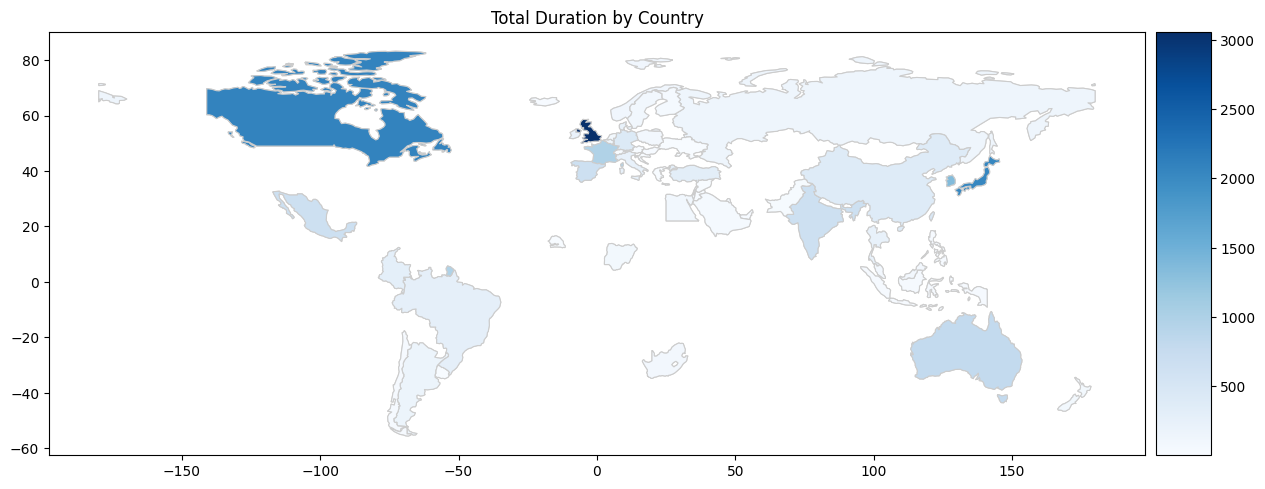

In [ ]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


merged = world.merge(combined_df, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='total_duration', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Total Duration by Country')

sm = cm.ScalarMappable(cmap='Blues')
sm.set_array(merged['total_duration'])


plt.show()

In [ ]:
fig = px.scatter_geo(combined_df,
                     locations='country',
                     locationmode='country names',
                     color='type',
                     hover_name='country',
                     hover_data={'type': True, 'total_duration': True},
                     color_discrete_map={'Movie': 'blue', 'TV Show': 'green'},
                     title='Countries with Both TV Shows and Movies',
                     labels={'type': 'Content Type', 'duration': 'Duration'},
                     custom_data=['type', 'total_duration','count'],
                     width=1000, height=600,
                     template='plotly_dark')


fig.update_traces(marker=dict(size=10))
for trace, text in legend_text.items():
    fig.add_scattergeo(lon=[None], lat=[None], mode='markers', marker=dict(size=0), name=text, showlegend=True, legendgroup=text)


In [ ]:
fig.update_layout(geo=dict(showcountries=True))

fig.update_traces(hovertemplate='<b>Country:</b> %{hovertext}<br>'
                                  '<b>Type:</b> %{customdata[0]}<br>'
                                  '<b>Duration (Hours):</b> %{customdata[1]}<br>'
                                  '<b>Total %{customdata[0]}:</b> %{customdata[2]}')

fig.show()

In [ ]:
combined_df.sort_values(by='country', ascending=True)

,country,type,total_duration,count
0,,Movie,1.7,1
1,,TV Show,6.7,1
2,Argentina,Movie,107.5,71
3,Argentina,TV Show,180.4,20
4,Australia,Movie,155.2,94
...,...,...,...,...
117,United States,TV Show,12892.8,891
118,Uruguay,Movie,18.5,13
119,Uruguay,TV Show,13.3,1
120,West Germany,Movie,5.7,3


## **This section is displaying the dataset on the map using the Folium Library**

In [ ]:
from geopy.geocoders import Photon
grouped_df1 = combined_df

grouped_df = grouped_df1.groupby(['country', 'type']).agg({'total_duration': 'sum', 'count': 'sum'}).reset_index()

geolocator = Photon(user_agent="measurements")

map = folium.Map(location=[0, 0], zoom_start=2)

In [ ]:
feature_group_movies = folium.FeatureGroup(name='Movies')
feature_group_tv_shows = folium.FeatureGroup(name='TV Shows')

In [ ]:
for index, row in grouped_df.iterrows():
    location = geolocator.geocode(row['country'])
    if location:
        latitude = location.latitude
        longitude = location.longitude
        if row['type'] == 'Movie':
            icon = folium.Icon(color='red', icon='film', prefix='fa')  # Movie icon
            feature_group_movies.add_child(folium.Marker(location=[latitude, longitude], icon=icon,
                            popup=f"{row['country']} ({row['type']}) - Total Duration: {row['total_duration']} hours",
                            tooltip=f"Count: {row['count']}"))
        else:
            icon = folium.Icon(color='green', icon='tv', prefix='fa')  # TV show icon
            feature_group_tv_shows.add_child(folium.Marker(location=[latitude, longitude], icon=icon,
                            popup=f"{row['country']} ({row['type']}) - Total Duration: {row['total_duration']} hours",
                            tooltip=f"Count: {row['count']}"))

In [ ]:
map.add_child(feature_group_movies)
map.add_child(feature_group_tv_shows)

folium.LayerControl(collapsed=False).add_to(map)

In [ ]:
map

Both Plotly and Folium offer distinct advantages and drawbacks.

**Plotly:**

*Pros:*


1. Provides a wide array of chart types suitable for diverse data visualization needs.
2. Offers extensive documentation and active community support.
3. Known for its user-friendly interface.

*Cons:*
1. Mapping capabilities are somewhat limited.
2. Customizing maps extensively or incorporating advanced geographical features may be challenging.


**Folium:**

*Pros:*
1. Praised for its advanced mapping functionalities.
2. Allows users to create interactive and highly customizable maps effortlessly.
3. Offers features like choropleth maps and customizable overlays for unparalleled flexibility in geographic data visualization.

*Cons:*
1. Has a steeper learning curve compared to Plotly.
2. Primarily focuses on geographic visualizations, offering fewer options for non-geographic charts.



In summary, Plotly is lauded for its ease of use and diverse charting options, making it suitable for a wide range of visualization tasks. Conversely, Folium stands out for its advanced map features but may require a more significant learning investment, particularly for users seeking non-geographic visualizations.